# 라이브러리 및 데이터 로드

In [2]:
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from tensorflow.keras.datasets.mnist import load_data

In [3]:
(train_images, train_labels), test_ds = load_data()
print(type(train_images), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


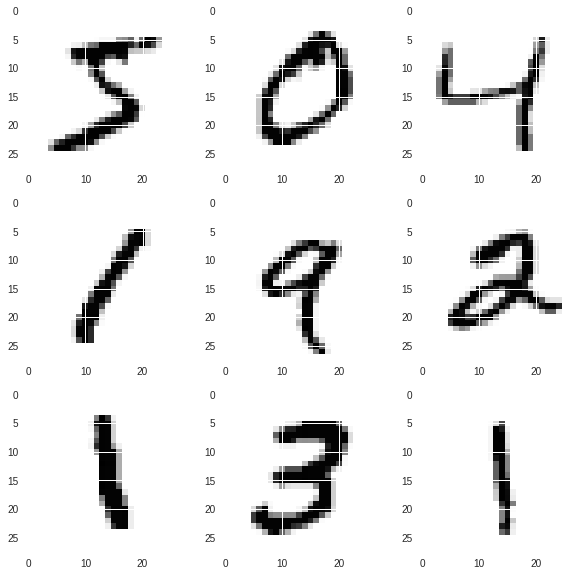

In [6]:
view_images = train_images[:9, ...]

fig, axes = plt.subplots(3, 3, figsize=(10,10))
for ax_idx, ax in enumerate(axes.flat):
  image = view_images[ax_idx]
  ax.imshow(image)

# 파라미터 설정 / W, B 생성

In [13]:
# set test env.
n_data = train_images.shape[0]
n_feature = train_images.shape[1] * train_images.shape[2]
b_size = 64
n_batch = n_data // b_size
epochs = 20
lr = 0.03
units = [64, 32, 10] # neuron 개수

# initialize W, B
W1 = normal(0, 1, (n_feature, units[0]))
B1 = zeros(units[0])

W2 = normal(0, 1, (units[0], units[1]))
B2 = zeros(units[1])

W3 = normal(0, 1, (units[1], units[2]))
B3 = zeros(units[2])

print(colored("W/B shapes", 'green'))
print(f"W1/B1: {W1.shape}/{B1.shape}")
print(f"W2/B2: {W2.shape}/{B2.shape}")
print(f"W3/B3: {W3.shape}/{B3.shape}")


W/B shapes
W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)


In [26]:
losses, accs = list(), list()

for epoch in range(epochs):
  n_correct, n_data = 0, 0
  
  # get minibatch
  for b_idx in range(n_batch):
    start_idx = b_idx * b_size
    end_idx = (b_idx+1) * b_size
    images = train_images[start_idx : end_idx, ...]
    
    X = images.reshape(b_size, -1)
    Y = train_labels[start_idx : end_idx]

    ### forward propagation
    # dense1:
    Z1 = X @ W1 + B1
    A1 = 1 / (1 + np.exp(-Z1))
    # dense2
    Z2 = A1 @ W2 + B2
    A2 = 1 / (1 + np.exp(-Z2))
    # dense3
    L = A2 @ W3 + B3
    
    # loss
    Pred = np.exp(L)/ np.sum(np.exp(L), axis=1, keepdims=True)
    J0 = -np.log(Pred[np.arange(b_size), Y])
    J = np.mean(J0)
    losses.append(J)

    # calculate accuracy
    Pred_label = np.argmax(Pred, axis=1)
    n_correct += np.sum(Pred_label == Y)
    n_data += b_size

    #### backpropagation
    labels = Y.copy()
    Y = np.zeros_like(Pred)
    Y[np.arange(b_size), labels] = 1

    # loss
    dL = -1/b_size *(Y-Pred)
    # dense 3
    dA2 = dL @ W3.T
    dW3 = A2.T @ dL
    dB3 = np.sum(dL,axis=0)
    # dense 2
    dZ2 = dA2 * A2*(1-A2)
    dA1 = dZ2 @ W2.T
    dW2 = A1.T @ dZ2
    dB2 = np.sum(dZ2,axis=0)
    # dense 1
    dZ1 = dA1 * A1*(1-A1)
    dW1 = X.T @ dZ1
    dB1 = np.sum(dZ1,axis=0)

    # parameter update
    W3, B3 = W3 - lr*dW3, B3 - lr*dB3
    W2, B2 = W2 - lr*dW2, B2 - lr*dB2
    W1, B1 = W1 - lr*dW1, B1 - lr*dB1
  
  accs.append(n_correct/n_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


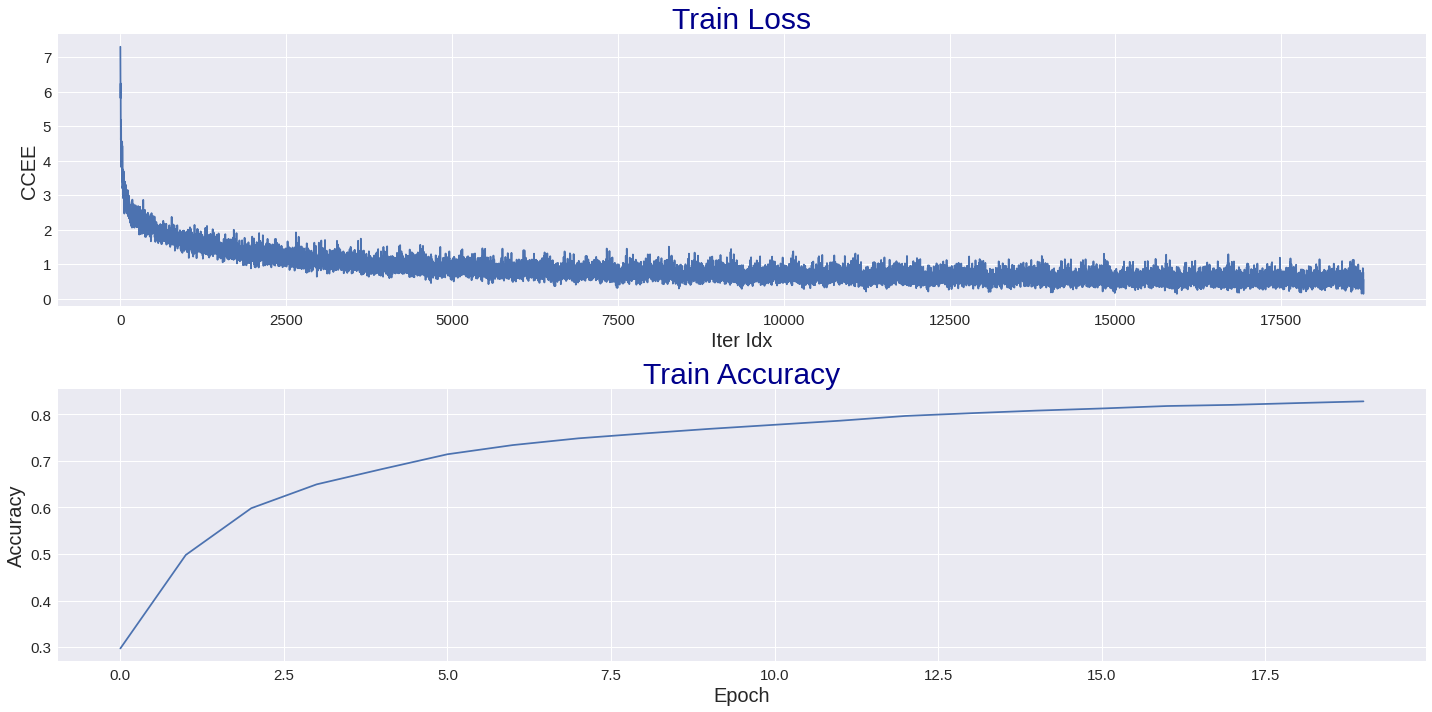

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_title('Train Loss', color='darkblue', fontsize= 30)
axes[0].set_xlabel("Iter Idx", fontsize = 20)
axes[0].set_ylabel("CCEE", fontsize=20)

axes[1].set_title('Train Accuracy', color='darkblue', fontsize= 30)
axes[1].set_xlabel("Epoch", fontsize = 20)
axes[1].set_ylabel("Accuracy", fontsize=20)

axes[0].tick_params(labelsize=15)
axes[1].tick_params(labelsize=15)

fig.tight_layout()